# **LOAD DATA**

**Connecting to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/resit_data/data'

Mounted at /content/drive


**Importing the data**

In [ ]:
import pandas as pd

training1 = pd.read_csv(f'{data_dir}/training1.csv')
training2 = pd.read_csv(f'{data_dir}/training2.csv')
test = pd.read_csv(f'{data_dir}/test.csv')

# **DATA PRE-PROCESSING**

**Imputation**

In [ ]:
from sklearn.impute import SimpleImputer

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Drop non-feature columns before fitting the imputer (e.g., 'label' and 'confidence')
training2_features = training2.drop(columns=['label', 'confidence'])

# Fit the imputer on the features only
training2_imputed_values = imputer.fit_transform(training2_features)

# Convert the imputed values back to a DataFrame and reattach 'label' and 'confidence' columns
training2_imputed = pd.DataFrame(training2_imputed_values, columns=training2_features.columns)
training2_imputed['label'] = training2['label']
training2_imputed['confidence'] = training2['confidence']

# Apply the same imputer to the test dataset
test_features = test.drop(columns=['label', 'confidence'], errors='ignore')
test_imputed_values = imputer.transform(test_features)

# Convert the imputed values back to a DataFrame
test_imputed = pd.DataFrame(test_imputed_values, columns=test_features.columns)


**Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialise the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
training1_scaled = pd.DataFrame(scaler.fit_transform(training1.drop(columns=['label', 'confidence'])), columns=training1.columns[:-2])
training2_scaled = pd.DataFrame(scaler.transform(training2_imputed.drop(columns=['label', 'confidence'])), columns=training2_imputed.columns[:-2])

# Transform the test data
test_scaled = pd.DataFrame(scaler.transform(test_imputed), columns=test_imputed.columns)


**Testing the imputation**

In [ ]:
# Check for missing values in the imputed training2 dataset
print("Missing values in training2_imputed:")
print(training2_imputed.isnull().sum().sum())

# Check for missing values in the imputed test dataset
print("Missing values in test_imputed:")
print(test_imputed.isnull().sum().sum())

Missing values in training2_imputed:
0
Missing values in test_imputed:
0


# **EXPLORATORY DATA ANALYSIS**

**Label distribution analysis**

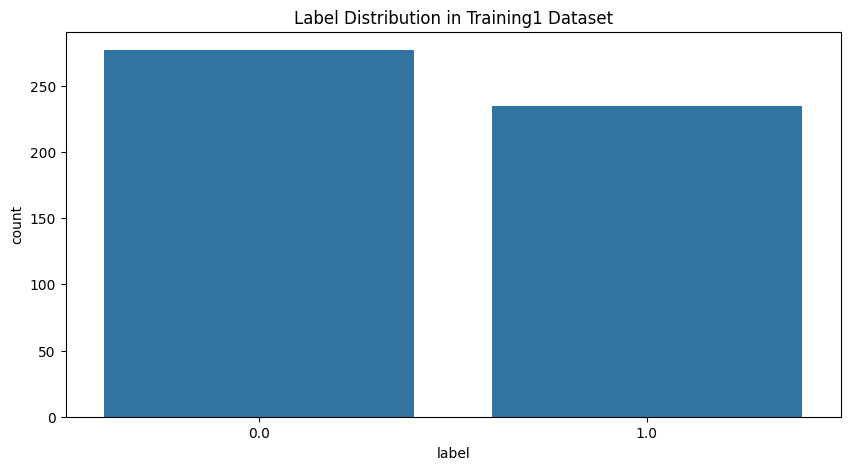

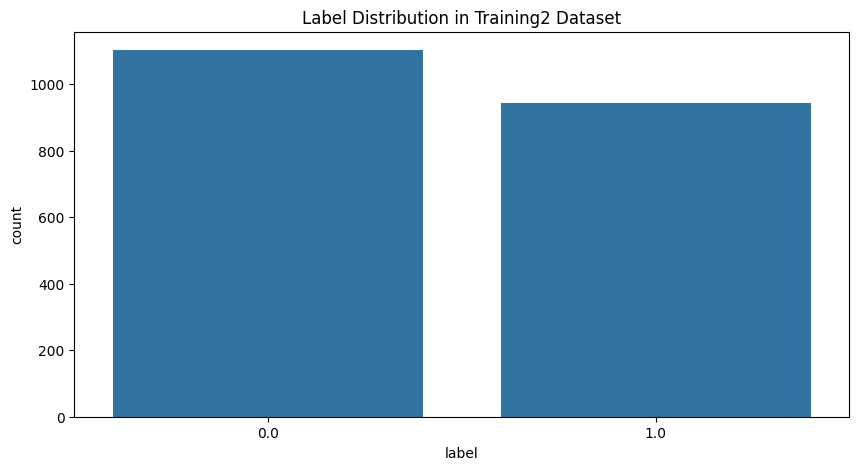

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of labels in training1
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=training1)
plt.title('Label Distribution in Training1 Dataset')
plt.show()

# Plot the distribution of labels in training2
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=training2)
plt.title('Label Distribution in Training2 Dataset')
plt.show()

**Distribution of confidence scores**

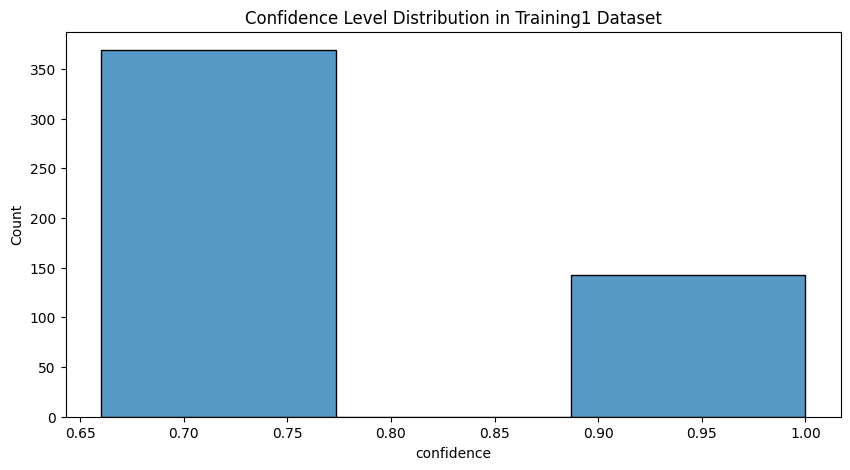

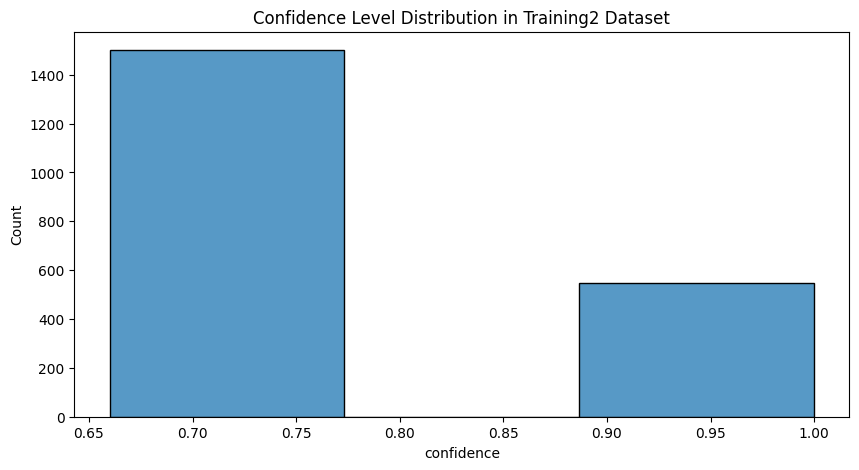

In [ ]:
# Plot the distribution of confidence levels in training1
plt.figure(figsize=(10, 5))
sns.histplot(training1['confidence'], bins=3, kde=False)
plt.title('Confidence Level Distribution in Training1 Dataset')
plt.show()

# Plot the distribution of confidence levels in training2
plt.figure(figsize=(10, 5))
sns.histplot(training2['confidence'], bins=3, kde=False)
plt.title('Confidence Level Distribution in Training2 Dataset')
plt.show()

**Feature distribution analysis**

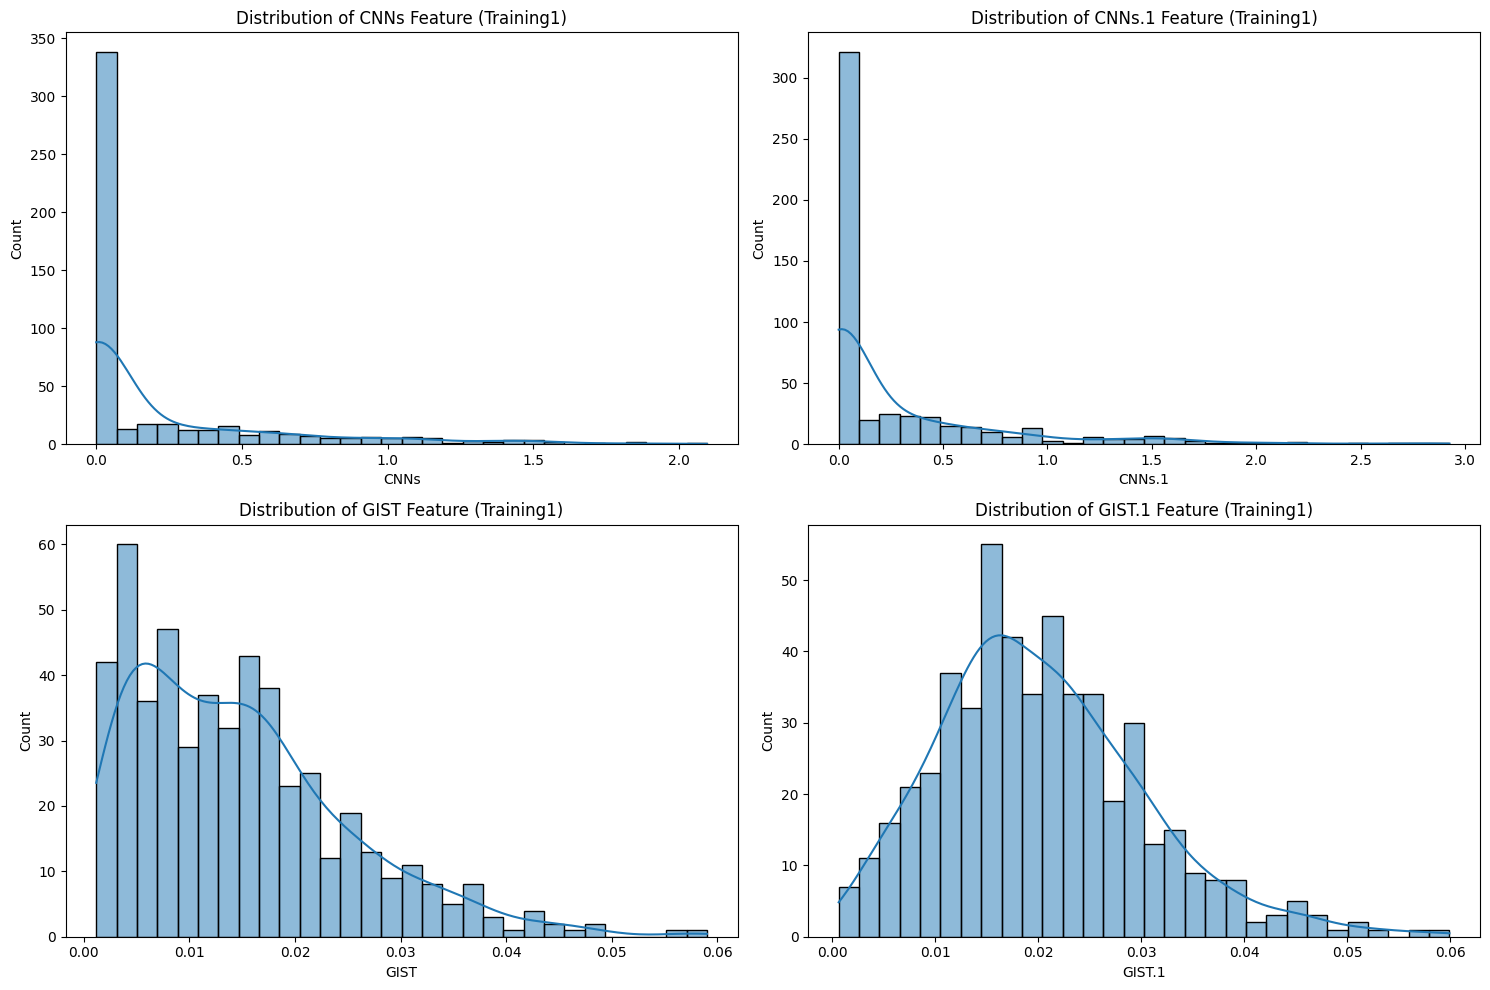

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot for CNNs feature example: CNNs
plt.subplot(2, 2, 1)
sns.histplot(training1['CNNs'], bins=30, kde=True)
plt.title('Distribution of CNNs Feature (Training1)')

# Plot for CNNs feature example: CNNs.1
plt.subplot(2, 2, 2)
sns.histplot(training1['CNNs.1'], bins=30, kde=True)
plt.title('Distribution of CNNs.1 Feature (Training1)')

# Plot for GIST feature example: GIST
plt.subplot(2, 2, 3)
sns.histplot(training1['GIST'], bins=30, kde=True)
plt.title('Distribution of GIST Feature (Training1)')

# Plot for GIST feature example: GIST.1
plt.subplot(2, 2, 4)
sns.histplot(training1['GIST.1'], bins=30, kde=True)
plt.title('Distribution of GIST.1 Feature (Training1)')

plt.tight_layout()
plt.show()


**Correlation analysis**

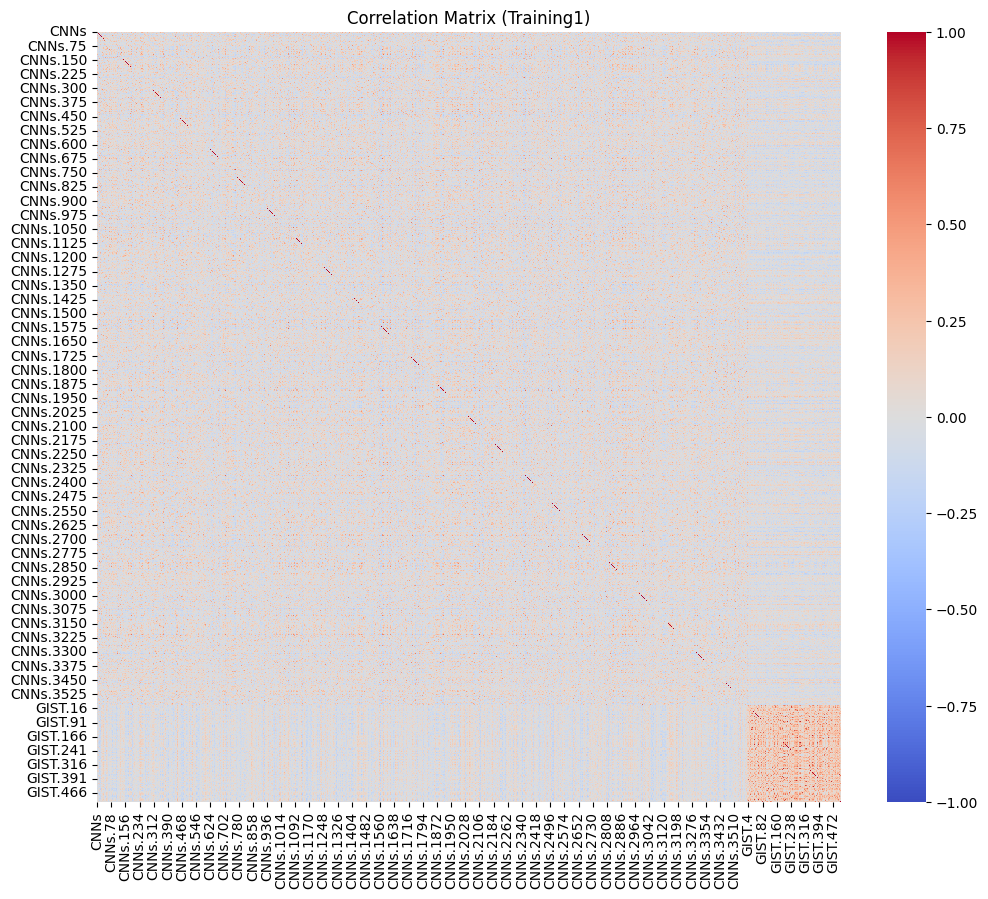

In [ ]:
# Compute the correlation matrix for training1
corr_matrix = training1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Training1)')
plt.show()


**Checking for outliers**

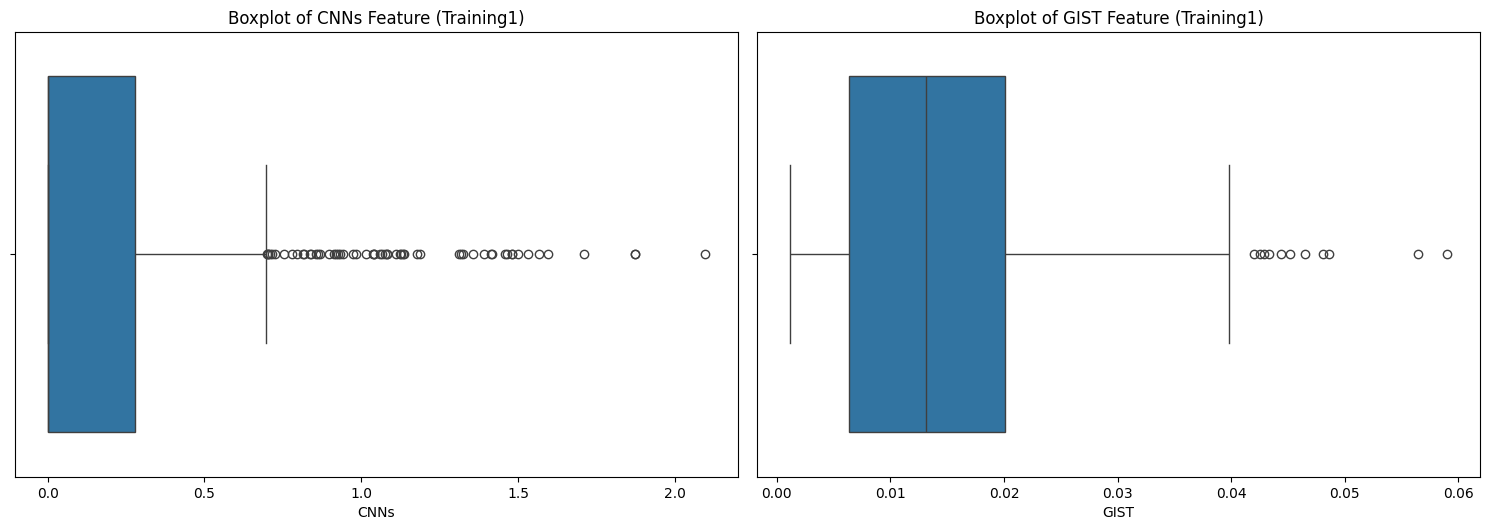

In [ ]:
# Plot boxplots for a few selected features
plt.figure(figsize=(15, 10))

# Example feature: CNNs
plt.subplot(2, 2, 1)
sns.boxplot(x=training1['CNNs'])
plt.title('Boxplot of CNNs Feature (Training1)')

# Example feature: GIST
plt.subplot(2, 2, 2)
sns.boxplot(x=training1['GIST'])
plt.title('Boxplot of GIST Feature (Training1)')

plt.tight_layout()
plt.show()


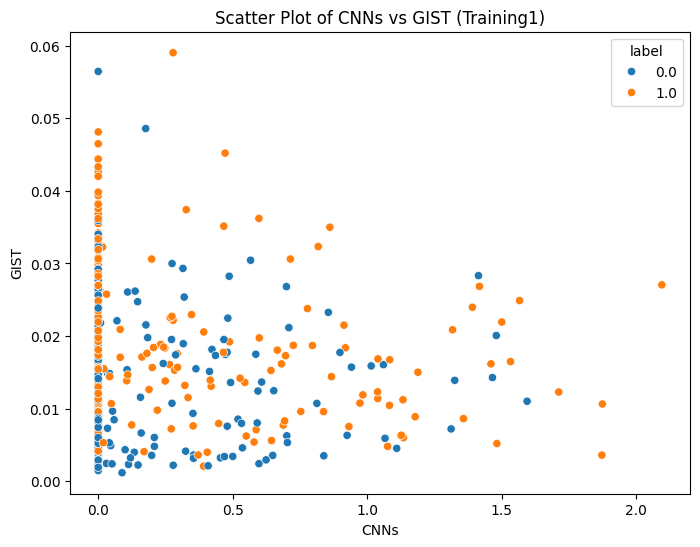

In [ ]:
# Example scatter plot between two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CNNs', y='GIST', data=training1, hue='label')
plt.title('Scatter Plot of CNNs vs GIST (Training1)')
plt.show()


# **PCA**

**Applying PCA (Principle Component Analysis)**

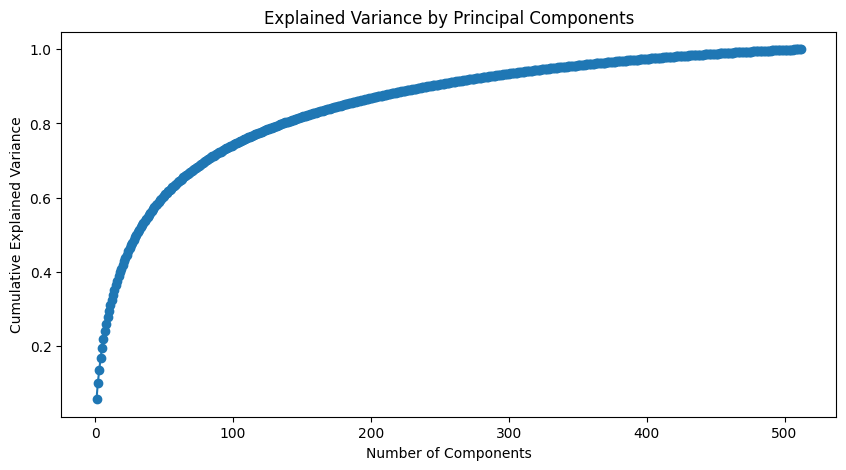

Number of components to retain 95% variance: 335


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features and labels
X_train1 = training1_scaled
y_train1 = training1['label']
X_train2 = training2_scaled
y_train2 = training2_imputed['label']

# Apply PCA
pca = PCA()
X_train1_pca = pca.fit_transform(X_train1)
X_train2_pca = pca.transform(X_train2)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Select number of components that explain a significant amount of variance, e.g., 95%
n_components = (explained_variance.cumsum() >= 0.95).argmax() + 1
print(f'Number of components to retain 95% variance: {n_components}')

# Apply PCA with selected number of components
pca = PCA(n_components=n_components)
X_train1_pca = pca.fit_transform(X_train1)
X_train2_pca = pca.transform(X_train2)

# Create DataFrames for the transformed data
train1_pca_df = pd.DataFrame(X_train1_pca, columns=[f'PC{i+1}' for i in range(n_components)])
train1_pca_df['label'] = y_train1.values
train1_pca_df['confidence'] = training1['confidence'].values

train2_pca_df = pd.DataFrame(X_train2_pca, columns=[f'PC{i+1}' for i in range(n_components)])
train2_pca_df['label'] = y_train2.values
train2_pca_df['confidence'] = training2_imputed['confidence'].values

# Save the transformed datasets
train1_pca_df.to_csv(f'{data_dir}/training1_pca.csv', index=False)
train2_pca_df.to_csv(f'{data_dir}/training2_pca.csv', index=False)

**Applying the PCA transformation with 335 components to both training and test datasets**

In [ ]:
pca = PCA(n_components=335)

# Fit and transform training data
X_train1_pca = pca.fit_transform(X_train1)
X_train2_pca = pca.transform(X_train2)

# Transform test data
test_pca = pca.transform(test_scaled)

# Create DataFrames for the transformed data:
train1_pca_df = pd.DataFrame(X_train1_pca, columns=[f'PC{i+1}' for i in range(335)])
train2_pca_df = pd.DataFrame(X_train2_pca, columns=[f'PC{i+1}' for i in range(335)])
test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(335)])

# **MODEL TRAINING AND EVALUATION**

**Split Data into Training and Validation Sets**

**Train and evaluate the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1_pca, y_train1, test_size=0.2, random_state=42)

# Initialise the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')


Validation Accuracy: 0.6699
Validation Precision: 0.6842
Validation Recall: 0.5417
Validation F1 Score: 0.6047


**Tune each model's hyperparameters using a grid search with cross-validation, then print the best parameters and F1 score for each model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define models and their parameter grids for tuning
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }
}

# Function to perform GridSearchCV and print best parameters and scores
def grid_search(model, params, X_train, y_train):
    gs = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    gs.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {gs.best_params_}")
    print(f"Best F1 Score: {gs.best_score_}")
    return gs.best_estimator_

best_models = {}
for model_name, mp in models.items():
    print(f"\nTuning {model_name}...")
    best_models[model_name] = grid_search(mp['model'], mp['params'], X_train1_pca, y_train1)



Tuning LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.01, 'solver': 'liblinear'}
Best F1 Score: 0.6966514733595467

Tuning RandomForest...
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.6755112524198521

Tuning SVM...
Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best F1 Score: 0.7263215008095876

Tuning GradientBoosting...
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best F1 Score: 0.7069910364349778


# **PREDICTIONS**

**Making predictions**

In [ ]:
best_model = best_models['SVM']
# Retrieve the label and confidence columns from the original datasets
y_train1 = training1['label']
confidence_train1 = training1['confidence']
y_train2 = training2_imputed['label']
confidence_train2 = training2_imputed['confidence']

# Add these columns back to the PCA-transformed DataFrames
train1_pca_df = pd.DataFrame(X_train1_pca, columns=[f'PC{i+1}' for i in range(n_components)])
train1_pca_df['label'] = y_train1.values
train1_pca_df['confidence'] = confidence_train1.values

train2_pca_df = pd.DataFrame(X_train2_pca, columns=[f'PC{i+1}' for i in range(n_components)])
train2_pca_df['label'] = y_train2.values
train2_pca_df['confidence'] = confidence_train2.values

# Combine the PCA data without labels and confidence scores for training
X_combined_train_pca = pd.concat([train1_pca_df.drop(columns=['label', 'confidence']),
                                  train2_pca_df.drop(columns=['label', 'confidence'])],
                                 ignore_index=True)
y_combined_train = pd.concat([train1_pca_df['label'], train2_pca_df['label']], ignore_index=True)

# Fit the best model on the combined training data
best_model.fit(X_combined_train_pca, y_combined_train)

# Make predictions on the PCA-transformed test set
test_predictions = best_model.predict(test_pca_df)

# Print predictions
print("Predictions on the test set:", test_predictions)

Predictions on the test set: [1. 0. 1. ... 1. 1. 1.]


**Saving predictions to csv file**

In [ ]:
predictions_df = pd.DataFrame({
    'prediction': test_predictions.astype(int)
})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

**Downloading predictions file**

In [ ]:
from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>